In [4]:
inpath = 'tablellama'

In [5]:
import torch
import torch.nn.functional as F
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM
import json
from tqdm import tqdm
import gc
import pandas as pd
import seaborn as sns
import pickle
import math
from IPython.display import clear_output
import numpy as np
import re
import os

sns.set_context("notebook", font_scale=1.25)
 
file_path = "turl_test_2k_prompts_50_unique.jsonl"
device = torch.device("mps")

In [14]:
outlist = []

for single_file in os.listdir(inpath):
    if 'aggregated' in single_file and 'pickle' in single_file:
        with open(os.path.join(inpath, single_file), 'rb') as handle:
            myfile = pickle.load(handle)
            temperature = single_file.split('_')[-1][:3]
            myfile['temp'] = temperature
            outlist.append(myfile)

In [15]:
d = pd.concat(outlist)

In [18]:
d

,pid,answer_clean,cand_clean,regex_match_clean,num_answers,answers_freqs,answers_entropy,answers_entropy_norm,regex_match_freqs,regex_match_entropy,regex_match_entropy_norm,correct,temp
0,13,[penalty recordings american record label reco...,"[, '- and , '-deuterium-labeled dopamine. syn...",[penalty recordings american record label reco...,1,[10],0.000000,0.000000,[10],0.000000,0.000000,1.0,0.2
1,14,[sony bmg former american record company recor...,[sony movie channel american movie-oriented te...,"[None, None, sony music american music company...",2,"[4, 6]",0.673012,0.673012,"[4, 6]",0.673012,0.673012,0.6,0.2
2,17,[huánuco province province of peru province of...,[predefinição:futebol león de huánuco wikimedi...,"[None, huanuco region of peru region of peru, ...",2,"[2, 8]",0.500402,0.500402,"[2, 8]",0.500402,0.500402,0.8,0.2
3,19,[fitzroy football club australian rules footba...,[fitzroy former state electoral district of qu...,[fitzroy football club australian rules footba...,1,[10],0.000000,0.000000,[10],0.000000,0.000000,1.0,0.2
4,41,[augustinians religious order of the roman cat...,[independent augustinian communities none none...,[augustinians religious order of the roman cat...,1,[10],0.000000,0.000000,[10],0.000000,0.000000,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1752,"[ilmer village in buckinghamshire, united king...","[walther ilmer none human, ilmer höhe hill in ...","[ilmer village in buckinghamshire, united king...",1,[10],0.000000,0.000000,[10],0.000000,0.000000,1.0,0.7
204,1764,[boston red sox baseball team and major league...,[carolina mudcats minor league baseball team b...,[boston red sox baseball team and major league...,1,[10],0.000000,0.000000,[10],0.000000,0.000000,1.0,0.7
205,1779,[melbourne victory association football team f...,[2017–18 melbourne victory fc season season of...,[melbourne victory association football team f...,2,"[4, 6]",0.673012,0.673012,"[4, 6]",0.673012,0.673012,0.4,0.7
206,1786,[indian national congress indian political par...,[indian youth congress youth wing of the india...,[indian national congress indian political par...,1,[10],0.000000,0.000000,[10],0.000000,0.000000,1.0,0.7


In [34]:
d = d.sort_values(by=['temp', 'pid'])
d = d.rename(columns={'temp':'temperature'})

<Axes: xlabel='temperature', ylabel='answers_entropy_norm'>

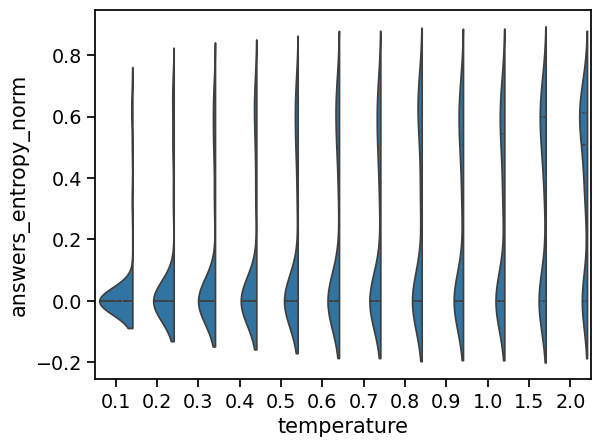

In [36]:
sns.violinplot(data=d, x="temperature", y="answers_entropy_norm", split=True, inner="quart")

<Axes: xlabel='temperature', ylabel='num_answers'>

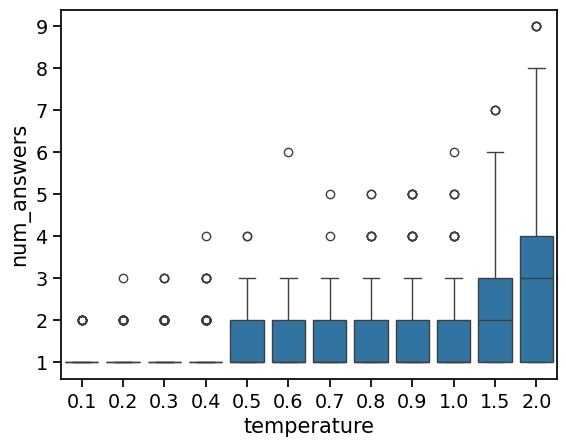

In [37]:
sns.boxplot(data=d, x="temperature", y="num_answers")

<Axes: xlabel='temperature', ylabel='answers_entropy_norm'>

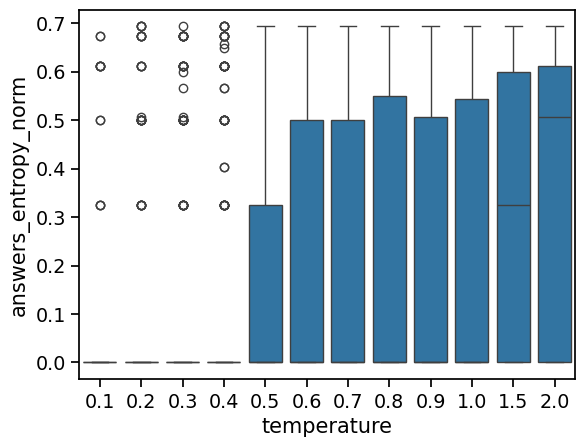

In [38]:
sns.boxplot(data=d, x="temperature", y="answers_entropy_norm")

<Axes: xlabel='temperature', ylabel='correct'>

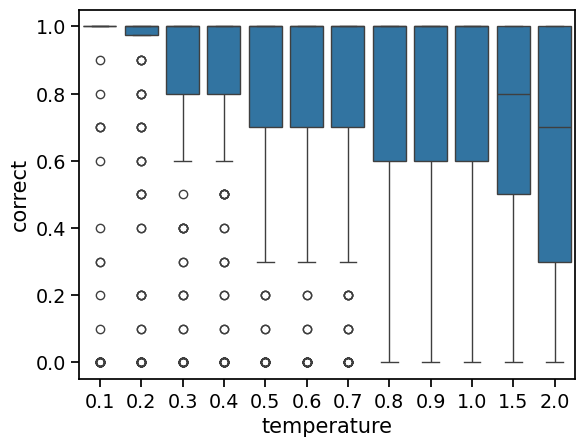

In [39]:
sns.boxplot(data=d, x="temperature", y="correct")

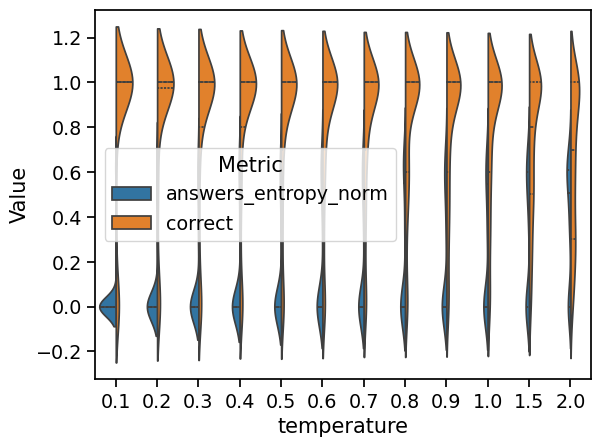

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


d_melted = pd.melt(d, id_vars=["temperature"], value_vars=["answers_entropy_norm", "correct"],
                   var_name="Metric", value_name="Value")

sns.violinplot(data=d_melted, x="temperature", y="Value", hue="Metric", split=True, inner="quart")

plt.show()

/var/folders/kn/n2krf1q970d6cfl43cjq73s80000gn/T/ipykernel_95325/2571452054.py:12: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.violinplot(
/var/folders/kn/n2krf1q970d6cfl43cjq73s80000gn/T/ipykernel_95325/2571452054.py:12: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


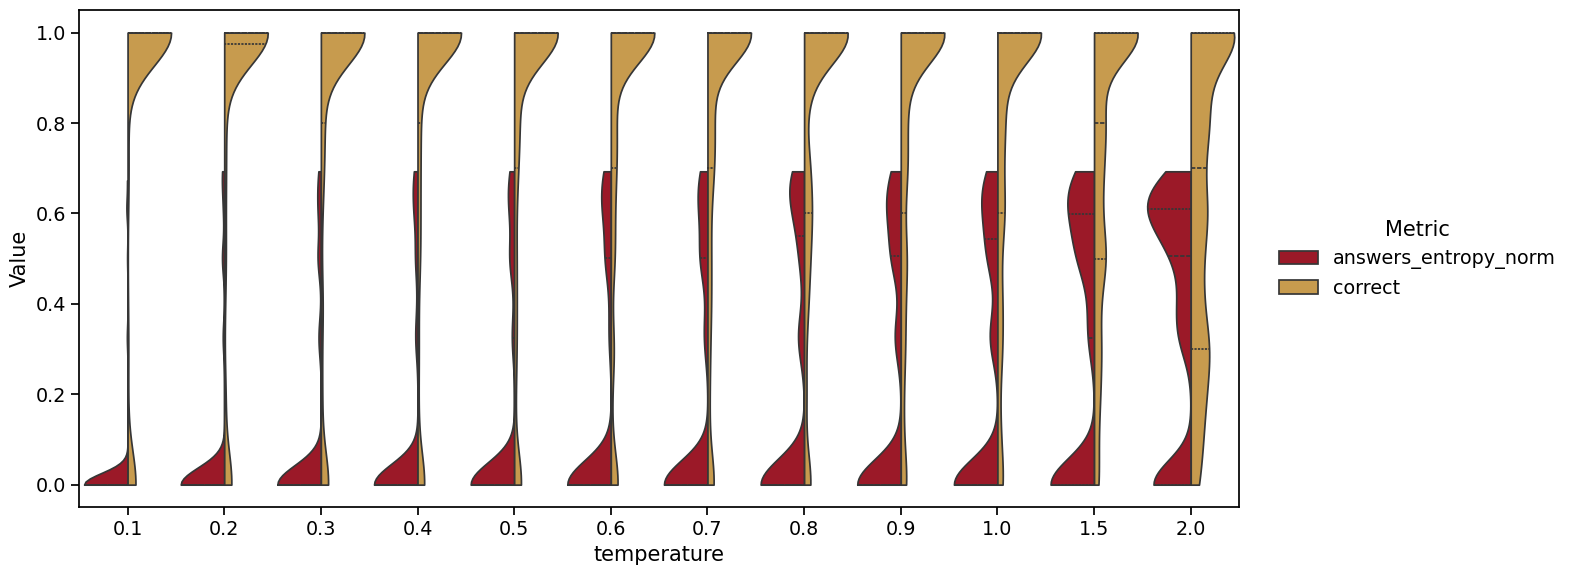

In [53]:
from palettable.cartocolors.qualitative import Prism_10, Bold_10, Bold_7
from palettable.tableau import TrafficLight_9, BlueRed_12
palette = TrafficLight_9.mpl_colors

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `d_melted` is already created
plt.figure(figsize=(16, 6))

sns.violinplot(
    data=d_melted,
    x="temperature",
    y="Value",
    hue="Metric",
    split=True,
    inner="quart",
    density_norm="count",
    cut=0,
    bw=0.2,
    width=0.9,
    palette=palette
)

plt.legend(
    title="Metric",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.tight_layout()  # Adjust layout so things don't overlap
plt.show()

/var/folders/kn/n2krf1q970d6cfl43cjq73s80000gn/T/ipykernel_95325/1464094971.py:13: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(


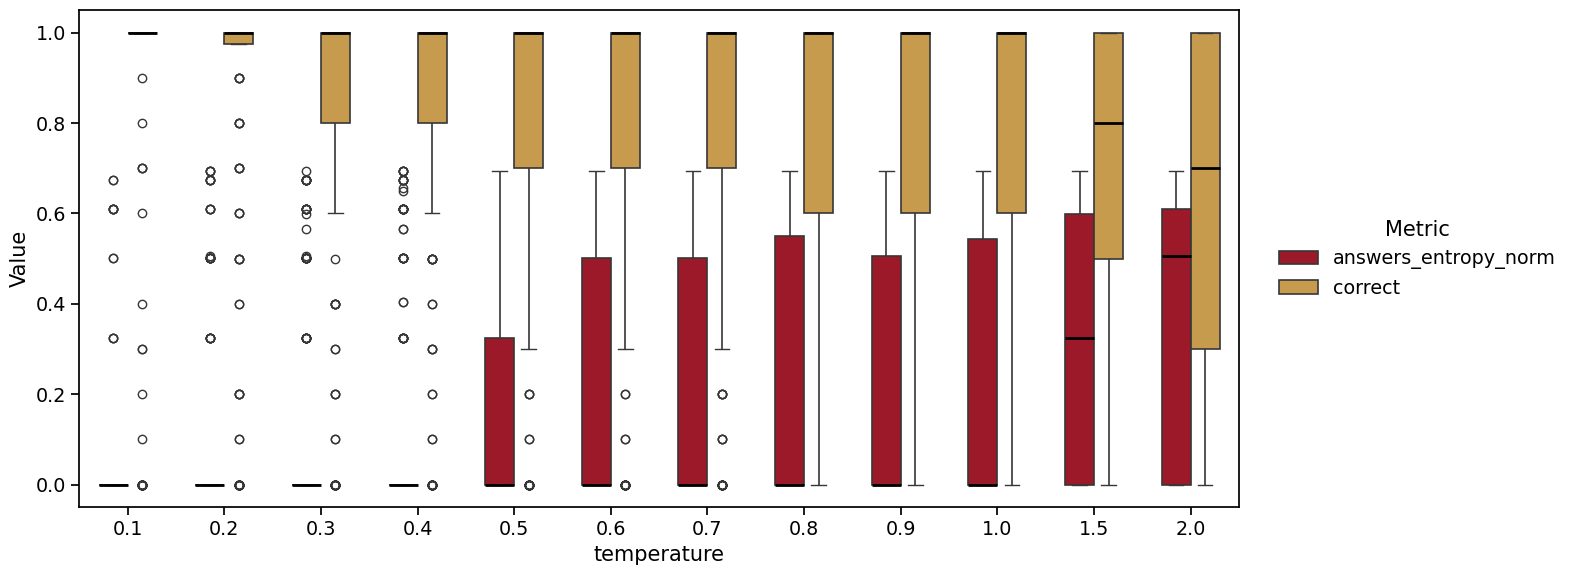

In [54]:
from palettable.tableau import TrafficLight_9
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Palette
palette = TrafficLight_9.mpl_colors

# Create figure
plt.figure(figsize=(16, 6))

# Boxplot instead of violinplot
sns.boxplot(
    data=d_melted,
    x="temperature",
    y="Value",
    hue="Metric",
    palette=palette,
    width=0.6,          # Width of the boxes
    dodge=True,         # Separates boxes by hue
    showcaps=True,      # Show caps
    boxprops={"linewidth": 1.2},
    whiskerprops={"linewidth": 1.2},
    medianprops={"color": "black", "linewidth": 2},
)

# Legend outside, without frame
plt.legend(
    title="Metric",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.tight_layout()
plt.show()